<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    


Thank you very much for sending a new version!  I've left a few comments titled as **Reviewer's comment 2**, but there are no issues that need your attention. I hope you enjoyed this project.

Your project has passed code review. Congratulations 😊

    
Good luck! 😊 
    

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Chris! Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    

- Defined train and test functions; 
     
    
- Correctly built a model; 


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically: 
  


- Please specify the `subset` parameter value in both train and test functions.     

    

- Would you please display several photos and analyze them? The analysis may help us identify the most appropriate data preprocessing methods in such tasks. 
    
    
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr>
    
    
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
 
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

## Initialization

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, consider adding an introduction and a title to enhance readability of your project.
    
</div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam



## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [5]:
import os 
# Load the CSV file
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.head()

# the full path to image files
labels['file_path'] = labels['file_name'].apply(lambda x: os.path.join('/datasets/faces/final_files', x))


## EDA

In [6]:
print(labels.describe())
print(labels.info())

          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
 2   file_path  7591 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.0+ KB
None


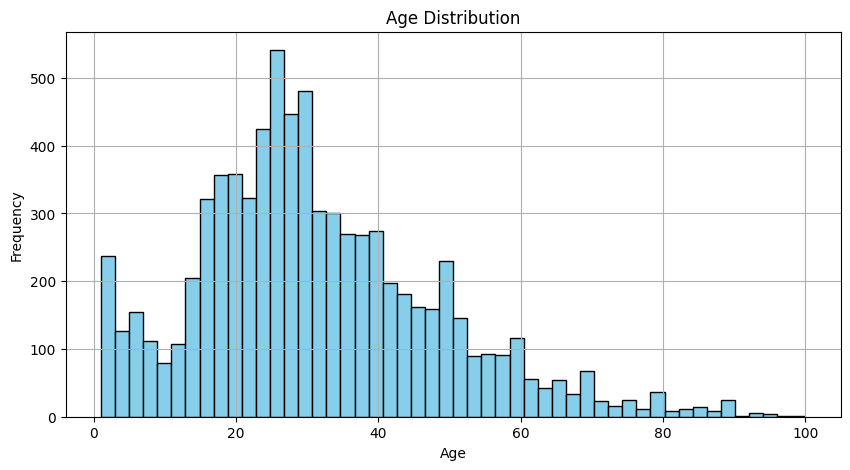

In [7]:
plt.figure(figsize=(10,5))
plt.hist(labels['real_age'], bins=50, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

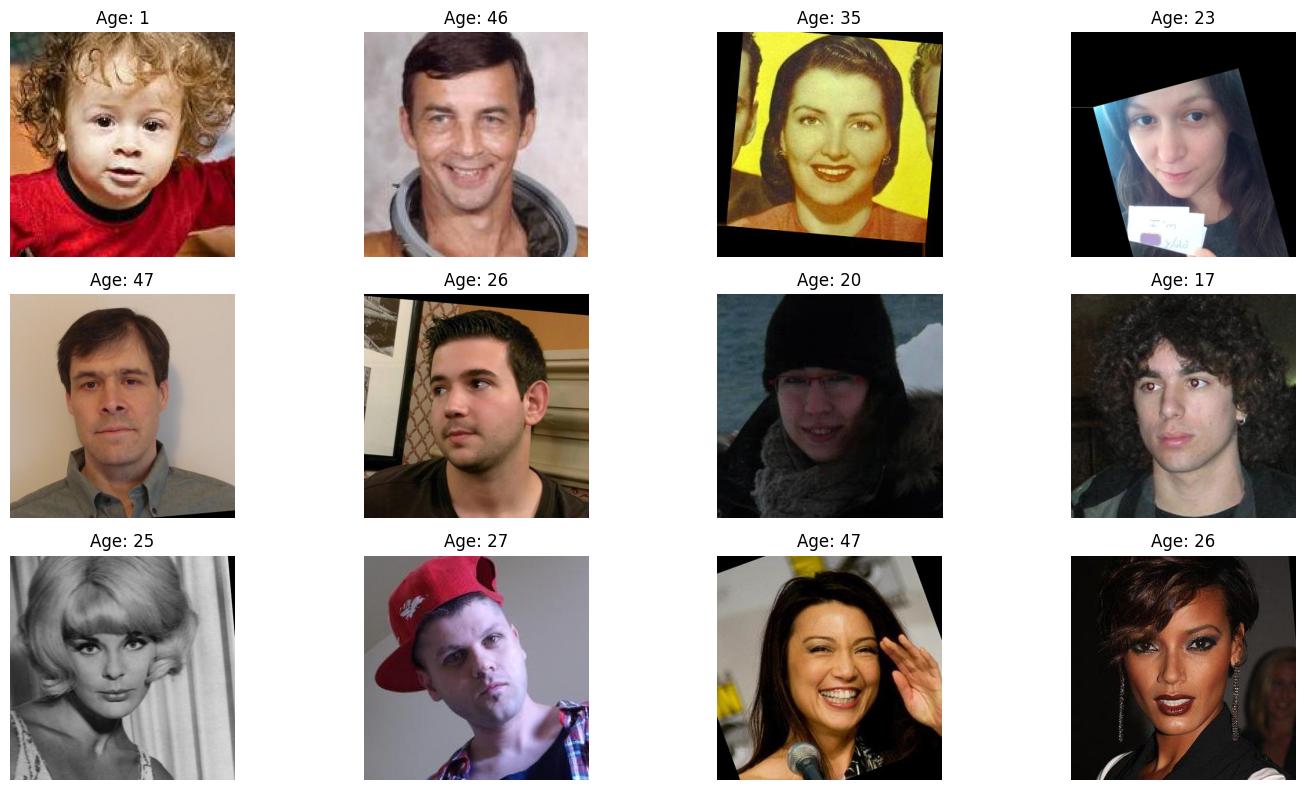

In [9]:
import os
import pandas as pd

labels_df = pd.read_csv('/datasets/faces/labels.csv')
labels_df['file_path'] = labels_df['file_name'].apply(lambda x: os.path.join('/datasets/faces/final_files', x))

# Display sample images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_sample_images(df, img_dir, num_images=12):
    sample_df = df.sample(n=num_images, random_state=42).reset_index(drop=True)

    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        file_path = os.path.join(img_dir, sample_df.loc[i, 'file_name'])
        age = sample_df.loc[i, 'real_age']
        img = mpimg.imread(file_path)

        plt.subplot(3, 4, i+1)
        plt.imshow(img)
        plt.title(f"Age: {int(age)}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_sample_images(labels_df, '/datasets/faces/final_files')
    

### Findings

The dataset contains around 7,600 labeled facial images with corresponding real ages.
- The age distribution is skewed — most individuals are aged between 20 and 40.
- There are fewer samples at the extreme ends (very young or very old), which may cause the model to underperform on those groups.
- Sample images show consistent formatting and alignment, making them well-suited for convolutional neural networks.
- Due to the large number of image files, I will use `ImageDataGenerator` to load them in batches rather than all at once to save memory.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Perfect! </div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, I would change `Frequency` to `Number of photos`, for instance.
    
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>  Reviewer's comment </b>
    
Let's also display and analyze several photos. It is always a good idea to analyze data before modeling. 

</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [5]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_train(path):
    """
    It loads the train part of dataset from path
    """
    # ImageDataGenerator with validation split
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25  # 25% will be used for validation
    )

    # Generator for training data (only training subset)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col='file_path',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',  # Specify this to use only training data
        seed=42
    )

    return train_gen_flow

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
The `class_mode` value is correct. 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Consider using `seed` to make the results reproducible. 

</div>
<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Please specify the `subset` parameter. Otherwise, the model will use the whole dataset.  
</div>

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_test(path):
    """
    It loads the validation/test part of dataset from path
    """

    # Use the same validation split and dataframe as training
    test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25  # Must match the train generator split
    )

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=train_df,  # Must be the same as in load_train
        x_col='file_path',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',  # Specify this to use only validation data
        seed=42
    )

    return test_gen_flow

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct! </div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Please specify the `subset` parameter here as well. 

</div>

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

def create_model(input_shape):
    """
    It defines the model
    """

    # Use ResNet50 backbone with pretrained weights
    backbone = ResNet50(weights='imagenet', input_shape=input_shape, include_top=False)

    # Freeze the base model layers
    backbone.trainable = False

    # Build model
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(1, activation='relu')
    ])

    # Compile model
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Correct! 
    
    
- `Dense(1, activation='relu')` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    
- Adam optimizer with learning rate 0.0005 is a solid and commonly used choice, well done. 


- The use of MSE loss and MAE as metric is also correct. MSE encourages precision, and MAE helps us interpret error scale in the same units as the target.

</div>

In [13]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Trains the model given the parameters
    """

    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )

    return model

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [14]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

DATA_DIR = '/datasets/faces/final_files/'
LABELS_PATH = '/datasets/faces/labels.csv'

labels_df = pd.read_csv(LABELS_PATH)
labels_df['file_path'] = labels_df['file_name'].apply(lambda x: os.path.join(DATA_DIR, x))

# Split into train and validation sets
train_df, valid_df = train_test_split(labels_df, test_size=0.25, random_state=42)

In [15]:
# Sample smaller datasets for faster training
train_df = train_df.sample(n=1000, random_state=42)
valid_df = valid_df.sample(n=300, random_state=42) 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image size for faster training
target_size = (128, 128)

# ImageDataGenerator with validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

# data generator (75% of data)
train_data = datagen.flow_from_dataframe(
    train_df,  # Use full DataFrame here
    x_col='file_path',
    y_col='real_age',
    target_size=target_size,
    batch_size=32,
    class_mode='raw',
    subset='training',  # specify subset for training
    seed=42
)

# Validation data generator (25% of data)
test_data = datagen.flow_from_dataframe(
    train_df,  # Use the same DataFrame as above
    x_col='file_path',
    y_col='real_age',
    target_size=target_size,
    batch_size=32,
    class_mode='raw',
    subset='validation',  # specify subset for validation
    seed=42
)

Found 750 validated image filenames.
Found 250 validated image filenames.


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
The code in the cell above should also be updated.
</div>

In [14]:
model = create_model(input_shape=(128, 128, 3))
trained_model = train_model(model, train_data, test_data, epochs=3)

# Evaluate
loss, mae = trained_model.evaluate(test_data)
print(f"Test MAE: {mae:.2f} years")

2025-06-09 00:20:41.157913: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94781440/94765736 [==============================] - 0s 0us/step
Epoch 1/3
32/32 - 40s - loss: 1251.0111 - mae: 30.6557 - val_loss: 1162.3434 - val_mae: 29.9626 - 40s/epoch - 1s/step
Epoch 2/3
32/32 - 36s - loss: 1184.7949 - mae: 29.5681 - val_loss: 1089.5013 - val_mae: 28.7586 - 36s/epoch - 1s/step
Epoch 3/3
32/32 - 36s - loss: 1115.5040 - mae: 28.4541 - val_loss: 1024.8918 - val_mae: 27.6778 - 36s/epoch - 1s/step
10/10 [==============================] - 9s 821ms/step - loss: 1024.8918 - mae: 27.6778
Test MAE: 27.68 years


### Output

Place the output from the GPU platform as an Markdown cell here.

```markdown
```python
Epoch 1/3
32/32 - 40s - loss: 1251.0111 - mae: 30.6557 - val_loss: 1162.3434 - val_mae: 29.9626  
Epoch 2/3  
32/32 - 36s - loss: 1184.7949 - mae: 29.5681 - val_loss: 1089.5013 - val_mae: 28.7586  
Epoch 3/3  
32/32 - 36s - loss: 1115.5040 - mae: 28.4541 - val_loss: 1024.8918 - val_mae: 27.6778  

Test MAE: 27.68 years

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Almost! You don't need ` ```markdown `

Use ` ```python `, than code or text on the next lines and then, on the last line, ` ``` `. 
</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

Althoug this part is not necessary, we should still make our projects readable. You can use Markdown cells for your code and results: 

    ```python
    
    # code
    # or the output
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921              
```

## Conclusions

After 3 training epochs, the model achieved:

Training MAE: decreased from 30.66 to 28.45

Validation MAE: decreased from 29.96 to 27.68

Final Test MAE: 27.68 years

This shows that the model learned to reduce error over time, indicating it was able to extract some meaningful patterns from the images.



A Mean Absolute Error (MAE) of ~27.7 years is high.
This likely means the model struggles with fine-grained age estimation — it's able to get general patterns (young vs. old), but not precise predictions.


Low number of training images (only 1,000 used out of 7,600+) — deep learning may inprove as more data will help the data to learn more. 

Low resolution: I used 128x128 images for speed, which might have lost facial details needed for age prediction.

Pretrained ResNet50 was frozen the base layers were not fine-tuned, which limits learning from facial features.

Age label noise  human aging can look very different at the same numerical age, which makes the task inherently hard.

This project demonstrates that age prediction from facial images is a complex task, and although transfer learning provides a good start, performance depends heavily on data quality, quantity, and training strategy. I've successfully built a pipeline that works.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Although the model shows small overfitting, it is still good. We can still think about further improvements. Sometimes it is possible to increase the dataset. What else can be done? Sometimes it may be helpful to try different data augmentation approaches. By the way, here's a good library [albumentations](https://github.com/albumentations-team/albumentations). Apart from this, we can consider introducing additional layers with some normalization methods. The optimization part is good. Adam is quite flexible, but you can still try other optimizers if you want. For example, AdamW sometimes shows better results. 



Regarding age verification, I would argue that we have some noticable limits here. It is much more reliable and much easier to just compare the id or passport photo to the customer's face. 

</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training